# Evaluation von MLLM Performance

In [1]:
# suppress warnings
import warnings
warnings.filterwarnings("ignore")
import contextlib, io
import nltk
# Standard-Imports
import os
import pandas as pd
from eval_close import evaluate_close
from eval_open import evaluate_open
from eval_g_eval import evaluate_geeval, compare_models
from eval_combined import evaluate_combined
from pathlib import Path


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Arbnor\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Arbnor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Arbnor\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Arbnor\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Arbnor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Arbnor\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# Daten einlesen

In [22]:
base = Path.cwd().parent / "docs" / "docs"
path = "gemma_system_prompt_batch_size_2_with_slake_dataset_validation_second_try.csv"
path_combined = os.path.join(base, path)
path_close = os.path.join(base, path)
path_open  = os.path.join(base, path)
path_ge    = os.path.join(base, "gemma_system_prompt_base_with_slake_dataset_validation.csv")


In [23]:
evaluate_combined(path_close)

Combined Evaluation
Samples evaluated: 1047
BLEU-1: 0.4080
BLEU-2: 0.3980
BLEU-4: 0.3901
ROUGE-1: 0.4331
ROUGE-2: 0.0059
ROUGE-L: 0.4331
Token-F1: 0.4238
BERTScore-precision: 0.7661
BERTScore-recall: 0.7608
BERTScore-F1: 0.7597


# Ja Nein Antworten

In [15]:
evaluate_close(path_close)


[Close] Accuracy: 87.21%, Precision: 87.12%, Recall: 87.12%, F1: 87.12%
              precision    recall  f1-score   support

          no       0.86      0.86      0.86      1545
         yes       0.88      0.88      0.88      1816

    accuracy                           0.87      3361
   macro avg       0.87      0.87      0.87      3361
weighted avg       0.87      0.87      0.87      3361


# Offene Fragen

In [16]:
evaluate_open(path_open)


Open-Ended Evaluation
Samples evaluated: 3357
BLEU-1: 0.3027
BLEU-2: 0.2895
BLEU-4: 0.2508
ROUGE-1: 0.3197
ROUGE-2: 0.0584
ROUGE-L: 0.3191
Token-F1: 0.5372
BERTScore-precision: 0.7618
BERTScore-recall: 0.7288
BERTScore-F1: 0.7378


# G-Eval 

G-Eval Auswertung
Anzahl Samples      : 3134
Mittelwert G-Eval Score: 0.332

-- Judgment Verteilung --
  correct     :  24.9% (779x)
  incorrect   :  73.9% (2317x)
  partially correct; could mislead:   1.2% (38x)


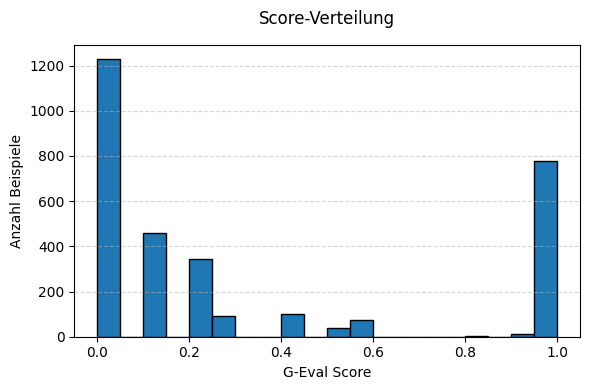

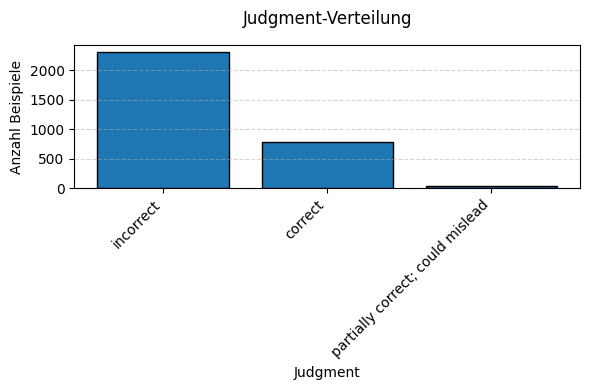

In [61]:
evaluate_geeval(path_ge)


In [7]:
model_paths = {
    "Batch Size 2" :            os.path.join(base, "g_eval_results_bs_2.csv"),
    "Batch Size 4 ":            os.path.join(base, "g_eval_results_bs_4.csv"),
    "Batch Size 8" :            os.path.join(base, "g_eval_results_bs_8.csv")
}

compare_models(model_paths, do_plot=True)


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Arbnor\\Desktop\\BA\\BA\\Bachelor_Arbeit_VQA\\docs\\docs\\g_eval_results_bs_2.csv'